## Artificial Intelligence (AI) Assisted Skin Wound Image Classification (Binary Classification) - Modularized Code File

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam


In [2]:
class DataPreprocessing:
    def __init__(self, train_data, val_data, test_data, target_size=(64, 64), batch_size=32):
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data
        self.target_size = target_size
        self.batch_size = batch_size

    def _initialize_datagen(self):
        # Training data augmentation
        self.train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
        self.val_datagen = ImageDataGenerator(rescale=1./255)

    def _flow_from_directory(self, directory, datagen):
        return datagen.flow_from_directory(directory,
                                           target_size=self.target_size,
                                           batch_size=self.batch_size,
                                           class_mode='binary')
    def preprocess_data(self):
        self._initialize_datagen()

        # Load the data using the flow_from_directory method
        training_set = self._flow_from_directory(self.train_data, self.train_datagen)
        validation_set = self._flow_from_directory(self.val_data, self.val_datagen)
        test_set = self._flow_from_directory(self.test_data, self.val_datagen)

        return training_set, validation_set, test_set


In [3]:
class CNNModel:
    def __init__(self, input_shape=(64, 64, 3), learning_rate=0.001):
        self.input_shape = input_shape
        self.learning_rate = learning_rate
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()

        # First Convolutional layer
        model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=self.input_shape))
        model.add(MaxPooling2D(pool_size=2, strides=2))

        # Second Convolutional layer
        model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2, strides=2))

        # Third Convolutional layer
        model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2, strides=2))

        # Flattening
        model.add(Flatten())

        # Fully connected layer
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

        # Output layer
        model.add(Dense(units=1, activation='sigmoid'))  # Output for binary classification

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model
    def train_model(self, training_set, validation_set, epochs=25):
        history = self.model.fit(x=training_set,
                                 steps_per_epoch=training_set.samples // training_set.batch_size,
                                 validation_data=validation_set,
                                 validation_steps=validation_set.samples // validation_set.batch_size,
                                 epochs=epochs)
        return history

    def evaluate_model(self, test_set):
        return self.model.evaluate(test_set)

    def predict(self, img_path):
        test_image = image.load_img(img_path, target_size=(64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = self.model.predict(test_image)
        return result



In [4]:
class Plotter:
    @staticmethod
    def plot_training_results(history):
        plt.figure(figsize=(10, 5))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy Plot')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss Plot')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()


In [9]:
class Prediction:
    def __init__(self, model, class_indices):
        self.model = model
        self.class_indices = class_indices

    def get_prediction(self, model, img_path):
        self.model = model
        result = self.model.predict(img_path)
        prediction = 'Actinic Keratosis' if result[0][0] == 1 else 'Seborrheic Keratosis'
        return prediction


In [11]:
# File paths
training_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/training_set'
validation_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/validation_set'
test_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/test_set'

# Data Preprocessing
data_processor = DataPreprocessing(training_data, validation_data, test_data)
training_set, validation_set, test_set = data_processor.preprocess_data()

Found 800 images belonging to 2 classes.
Found 375 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5694 - loss: 0.6871 - val_accuracy: 0.6222 - val_loss: 0.6436
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6229 - loss: 0.6507 - val_accuracy: 0.6705 - val_loss: 0.5587
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6328 - loss: 0.6142 - val_accuracy: 0.6619 - val_loss: 0.5461
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6458 - loss: 0.6119 - val_accuracy: 0.6449 - val_loss: 0.6144
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6413 - loss: 0.6224 - val_accuracy: 0.6818 - val_loss: 0.5367
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6539 - loss: 0.5787 - val_accuracy: 0.6705 - val_loss: 0.6000
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6335 - loss: 0.6241 - val_accuracy: 0.6761 - val_loss: 0.5770
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6896 - loss: 0.5655 - val_accuracy: 0.7415 - val_loss:

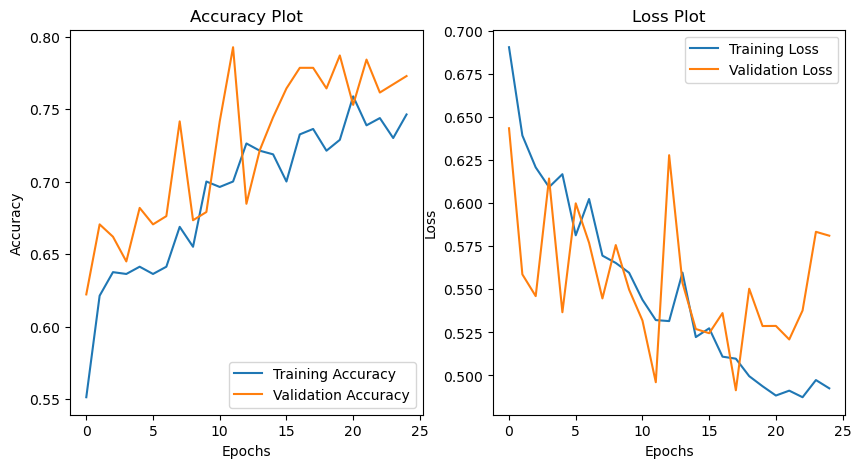

In [13]:
# CNN Model
cnn_model = CNNModel(input_shape=(64, 64, 3), learning_rate=0.001)
history = cnn_model.train_model(training_set, validation_set, epochs=25)

# Plot the training results
plotter = Plotter()
plotter.plot_training_results(history)

In [ ]:
# Predict on a new image
image_path = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/Prediction_set/Actinic_or_Seborrheic_1.jpg'
prediction = Prediction(cnn_model, training_set.class_indices)
predicted_class = prediction.get_prediction(cnn_model, image_path)

print(predicted_class)


In [ ]:
# Predict the class of the new image
